## Movie Classification with Deep Learning

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 

I only consider the top 50,000 most common words. 

The best accuarcy is 86.72% in validation set.

### Import Necessary Modules

In [8]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

import pandas as pd
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.layers import Dropout

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,653,301
Trainable params: 1,653,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 997s - loss: 0.5070 - acc: 0.7475 - val_loss: 0.3482 - val_acc: 0.8541
Epoch 2/10
25000/25000 [==============================] - 1009s - loss: 0.3286 - acc: 0.8687 - val_loss: 0.4327 - val_acc: 0.8037
Epoch 3/10
25000/25000 [==============================] - 1000s - loss: 0.2503 - a

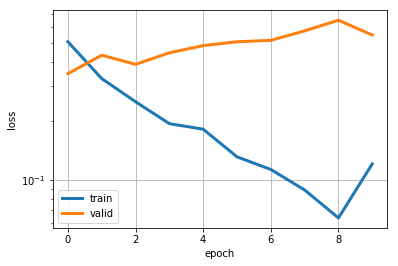

In [7]:
# Top most frequent words to consider
top_words = 50000
(X_train, y_train), (X_test, y_test) =  imdb.load_data(num_words = top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)



embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### More Complicated Neural Network

Make models more complicated in order to increase acuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 32)           2080      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 505       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 1,655,791
Trainable params: 1,655,791
Non-trainable params: 0
_________________________________________________________________


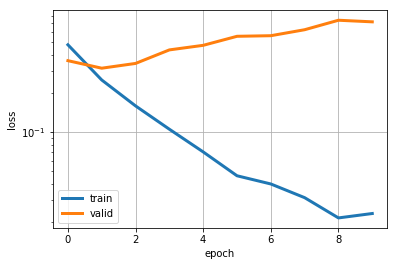

In [22]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### Convolutional Neural Network with Dropouts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 500, 32)           2080      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 707       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 40        
__________

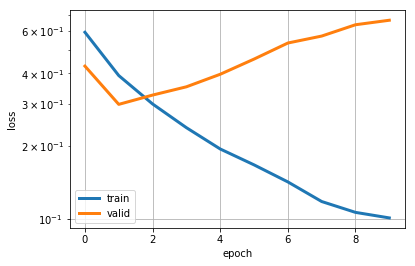

In [27]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           2080      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               109800    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 1359      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 70        
__________

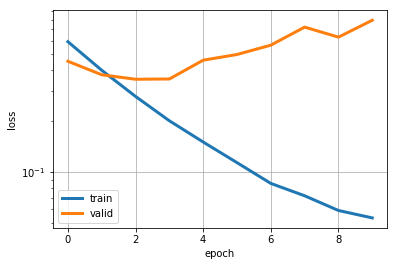

In [9]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(150, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()